In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("/home/sundali/桌面/jupyter_code/DL_to_dgg/融资商机自动推荐项目/1.create_data/business_12.csv")
print(len(data))
data.head()

371527


,商机编号,历史融资订单数量,融资订单总金额,是否办理过贷款,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,是否添加商务微信,商机与商务会面次数,备注是否包含关键字,10字以上备注条数,商机被客户剔除次数,客户投诉公司次数
0,7.773088e+18,0,0.0,否,NaN,2,89.0,NaN,0,否,0,0,0.0
1,2.509235e+06,0,0.0,否,NaN,3,72.0,是,1,否,1,0,NaN
2,7.761459e+18,0,0.0,否,NaN,3,83.0,NaN,1,NaN,1,0,NaN
3,7.688345e+18,0,0.0,否,NaN,4,77.0,是,0,否,0,1,NaN
4,7.724724e+18,0,0.0,否,NaN,6,98.0,否,0,否,0,0,0.0


# 1. 数据整体描述
1. 数据去重前后对比
2. info(),查看各个变量的类别
3. describe(),查看各个变量的缺失值个数,一些统计量
4. 数据质量描述
> 1. 利用missingno查看变量缺失个数,缺失相关性等
> 2. 通过describe()的count自行查看缺失情况
5. 进行单变量分析
> 1. 离散型变量以及与因变量关系
> 2. 连续型变量以及与因变量关系
6. 进行多变量分析
> 1. 查看变量之间相关性
> 2. 查看两个变量\三个变量一起与因变量关系

In [26]:
data.drop

<bound method DataFrame.drop of                 商机编号  历史融资订单数量  融资订单总金额 是否办理过贷款  最近一次贷款最今时长  商机历史咨询次数  \
0       7.773088e+18         0      0.0       否         NaN         2   
1       2.509235e+06         0      0.0       否         NaN         3   
2       7.761459e+18         0      0.0       否         NaN         3   
3       7.688345e+18         0      0.0       否         NaN         4   
4       7.724724e+18         0      0.0       否         NaN         6   
5       7.721289e+18         0      0.0       否         NaN         4   
6       7.715136e+18         0      0.0       否         NaN         4   
7       7.680969e+18         0      0.0       否         NaN         4   
8       7.738533e+18         0      0.0       否         NaN         3   
9       1.825895e+07         0      0.0       否         NaN         1   
10      7.773314e+18         0      0.0       否         NaN         0   
11      7.794859e+18         0      0.0       否         NaN         3   
12      7.687956e+1

## 1.1 data的info

In [27]:
info = data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371527 entries, 0 to 371526
Data columns (total 13 columns):
商机编号          371516 non-null float64
历史融资订单数量      371527 non-null int64
融资订单总金额       48391 non-null float64
是否办理过贷款       371527 non-null object
最近一次贷款最今时长    2731 non-null float64
商机历史咨询次数      371527 non-null int64
商机历史平均通话时长    371527 non-null float64
是否添加商务微信      297220 non-null object
商机与商务会面次数     371527 non-null int64
备注是否包含关键字     364095 non-null object
10字以上备注条数     371527 non-null int64
商机被客户剔除次数     371527 non-null int64
客户投诉公司次数      133581 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 36.8+ MB


## 1.2. data的describe,整体描述

In [28]:
# 1. describe
train_describe = data.describe()
train_describe

,商机编号,历史融资订单数量,融资订单总金额,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,商机与商务会面次数,10字以上备注条数,商机被客户剔除次数,客户投诉公司次数
count,3.715160e+05,371527.000000,48391.000000,2731.000000,371527.000000,371527.000000,371527.000000,371527.000000,371527.000000,133581.000000
mean,6.804847e+18,0.090166,0.567523,6.010253,3.001130,90.536677,1.003071,0.801328,0.401715,0.101601
std,2.522444e+18,0.300364,2.443827,2.450664,1.729849,13.432388,0.999867,0.895718,0.634606,0.319444
min,7.100000e+01,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000
25%,7.696924e+18,0.000000,0.000000,4.000000,2.000000,81.000000,0.000000,0.000000,0.000000,0.000000
50%,7.738978e+18,0.000000,0.000000,6.000000,3.000000,90.000000,1.000000,1.000000,0.000000,0.000000
75%,7.763609e+18,0.000000,0.000000,8.000000,4.000000,99.000000,2.000000,1.000000,1.000000,0.000000
max,7.803896e+18,5.000000,24.000000,17.000000,15.000000,172.000000,9.000000,7.000000,6.000000,5.000000


## 1.3 数据质量分析

### 1.3.1 缺失值变量统计

１．含有缺失值的变量的个数 4
2. all missing 0 
seriously missing 10
2. 各个变量的不缺失的分布图


/home/sundali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  *nbins*. If input is a sequence of arrays


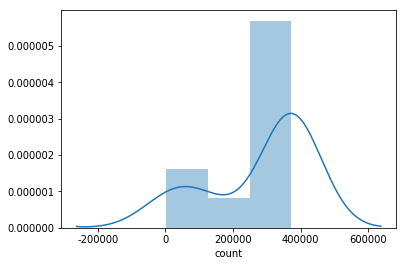

In [29]:
#1. 查看有缺失值的变量的统计
print("１．含有缺失值的变量的个数",np.sum(train_describe.loc["count"] != 371527))
print("2. all missing",np.sum(train_describe.loc["count"]==0),
      "\nseriously missing",np.sum((train_describe.loc["count"]<=371527)&(train_describe.loc["count"]>0)))
print("2. 各个变量的不缺失的分布图")
sns.distplot(train_describe.loc["count"])

In [30]:
# 2. 查看缺失的具体变量,这里查询完全缺失的变量名
train_cols_allnull = train_describe.columns[train_describe.loc["count"] ==0]
print(train_cols_allnull)
# 3. 缺失固定数量的变量的数据
train_step2 = data[list(set(data.columns) - set(train_cols_allnull))] #没有完全缺失的变量的数据
temp = train_describe.columns[train_describe.loc["count"] >2]
temp_null = train_step2[temp]
temp_null.head()

Index([], dtype='object')


,商机编号,历史融资订单数量,融资订单总金额,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,商机与商务会面次数,10字以上备注条数,商机被客户剔除次数,客户投诉公司次数
0,7.773088e+18,0,0.0,NaN,2,89.0,0,0,0,0.0
1,2.509235e+06,0,0.0,NaN,3,72.0,1,1,0,NaN
2,7.761459e+18,0,0.0,NaN,3,83.0,1,1,0,NaN
3,7.688345e+18,0,0.0,NaN,4,77.0,0,0,1,NaN
4,7.724724e+18,0,0.0,NaN,6,98.0,0,0,0,0.0


## 1.4 单一变量分析

## 1.5 

# 4. 计算某个变量筛选出来后，数据集的缺失个数
np.sum(np.sum(temp_null[temp_null["最近一次贷款最今时长"]>2].isnull())) #　np.sum()默认axis=none,计算全部

In [10]:
df = pd.DataFrame([(1,0),(1,1),(0,0),(0,1)],columns=["dogs","cats"])
histogram_intersection = lambda a, b: np.minimum(a, b).sum().round(decimals=1)
df.corr(method = "spearman")

,dogs,cats
dogs,1.0,0.0
cats,0.0,1.0


In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb = LabelEncoder()
lb.fit_transform(["我","是","who","这里","a"])

array([2, 3, 1, 4, 0])